# Lab 3-5 BONUS: Gaussian Smoke Stack Reflections
For this example, we want to plot concentrations downwind of a smokestack.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#First, we define some characteristics of our smokestack
Q = 85
# Q is a constant mass flux from the smokestack in kg/s
u = 4
# u is a constant wind speed in m/s at the effective stack height h
h = 200
# h is the effective height of the smokestack (actually stack height plus additional
# height the plume rises, in m

![smokestack_plume](Smokestack_gaussian_plume.png)

How much the plume spreads is a function of the distance from the stack, x, and the atmospheric stability.  We will incorporate the stability explicitly in lab 3-3.  
For now, we just define the values for our example.

In [5]:
x=1000 #not used, but referenced here because sigma values are a function of x, in m
sig_z=400
sig_y=800

# We are concerned with the centerline
y = 0
# And with how the plume concentration varies with height
# so we need to create a numpy array for a range of heights above the ground
z =  np.arange(0,600,1)

From lecture notes, we know that we can write
$$ C(x,y,z) = \frac{Q}{2\pi u\sigma_y\sigma_z}\exp(\frac{-(z-h)^2}{2\sigma_z^2})\exp(\frac{-y^2}{2\sigma_y^2}) $$

And then calculate and plot how the concentration looks downstream

In [4]:
C=Q/(2*np.pi*u*sig_z*sig_y)*np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2))) 

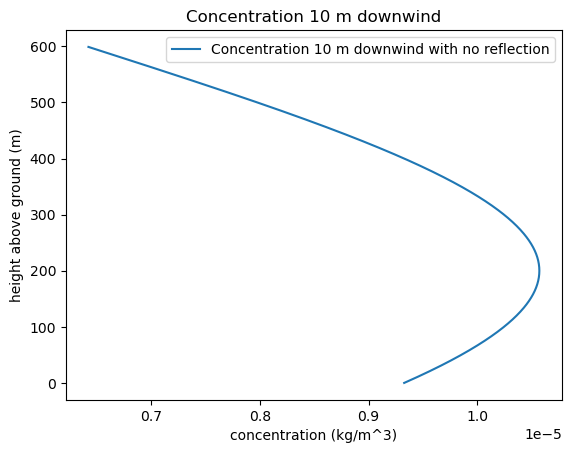

In [5]:
plt.figure()
plt.plot(C, z, label='Concentration 10 m downwind with no reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 10 m downwind')
plt.legend(loc="best")

You'll notice in the plot that the plume is not all accounted for.  Some of it has hit the ground and been reflected.  We can account for this by adding in an imaginary source below the ground at a mirror of the effective smokestack height as illustrated below.
![Plume_reflection](Plume_reflection.png)

---
Using the Code and the plot above as an example, calculate the correct concentration with height above the surface, accounting for this reflection.  For reference, the equation, from lecture notes, including this reflection is
$$ C(x,y,z) = \frac{Q}{2\pi u\sigma_y\sigma_z}[\exp(\frac{-(z-h)^2}{2\sigma_z^2})+\exp(\frac{-(z+h)^2}{2\sigma_z^2})]\exp(\frac{-y^2}{2\sigma_y^2}) $$

In [6]:
#Use this cell to write the python code for the equation with the reflection from the ground.

In [7]:
Cwreflect=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))

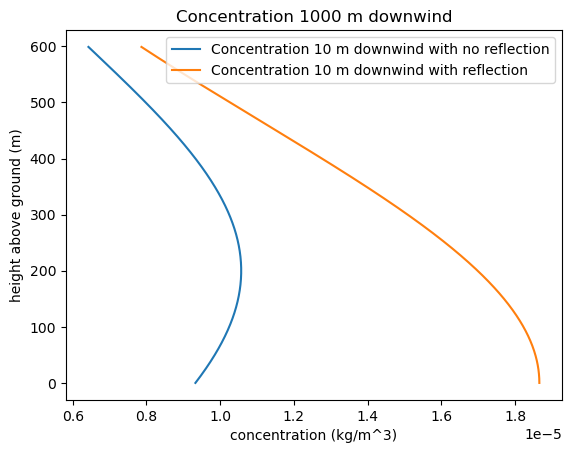

In [8]:
plt.figure()
plt.plot(C, z, label='Concentration 10 m downwind with no reflection')
plt.plot(Cwreflect, z, label='Concentration 10 m downwind with reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 1000 m downwind')
plt.legend(loc="best")

In this case, the reflection greatly increases the concentration levels near the ground.

$$ U_{AVG} = \frac{1}{H}\int_0^H u(z)dz $$

### Challenge Question!
For the example above, imagine there is an inversion at height H_I that completely reflects the pollution back down.  Add this to the code (in addition to the ground reflection, and add it to the plot.

Before we start writing equations, it's a really good idea to draw out what the reflection looks like.  I recommend drawing the original smokestack, and folding your paper along the inversion height.

![Inversion_reflection](Smokestack_oneReflection.jpg)

For reference, the equation to match the picture above, including both reflections is
$$ C(x,y,z) = \frac{Q}{2\pi u\sigma_y\sigma_z}[\exp(\frac{-(z-h)^2}{2\sigma_z^2})+\exp(\frac{-(z+h)^2}{2\sigma_z^2})+\exp(\frac{-(z+h-2H_I)^2}{2\sigma_z^2})]\exp(\frac{-y^2}{2\sigma_y^2}) $$

In [7]:
H_I=400;
Cwreflect2inv=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h-2*H_I,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))

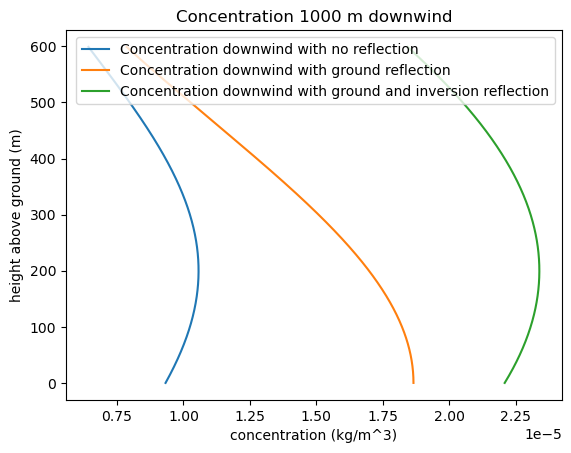

In [10]:
plt.figure()
plt.plot(C, z, label='Concentration downwind with no reflection')
plt.plot(Cwreflect, z, label='Concentration downwind with ground reflection')
plt.plot(Cwreflect2inv, z, label='Concentration downwind with ground and inversion reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 1000 m downwind')
plt.legend(loc="best")

## Something is wrong with the above picture!
If you look closely at this, you see that it is not correct -- pollution is getting past the inversion layer, and we said that this inversion completely blocks it, so what is going on?

Also, with the original ground reflection, the peak concentration was at the surface, at the point of reflection.  In the graph above, concentration is decreasing at the points of reflection?  This doesn't seem correct, but what is going on?

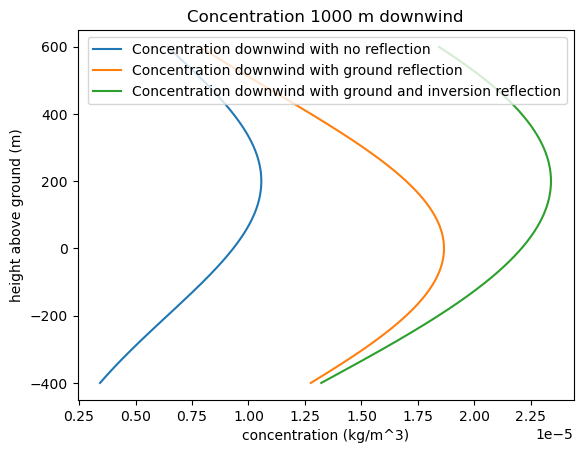

In [11]:
# Plot how the plume concentration varies with height
# Before we made a numpy array for a range of heights above the ground
# What does the computer think is happening below the ground?
z =  np.arange(-400,600,1)
C=Q/(2*np.pi*u*sig_z*sig_y)*np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2))) 
Cwreflect=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))
Cwreflect2inv=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h-2*H_I,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))

plt.figure()
plt.plot(C, z, label='Concentration downwind with no reflection')
plt.plot(Cwreflect, z, label='Concentration downwind with ground reflection')
plt.plot(Cwreflect2inv, z, label='Concentration downwind with ground and inversion reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 1000 m downwind')
plt.legend(loc="best")

### The computer has no way of knowing our imaginary smokestacks are not real!  We make the reflection principle work by not considering the calculated concentrations at the locations where we know the smoke cannot pass.  The occurred naturally with plotting above ground, but must be done manually for the inversion height.  We can not calculate concentrations above that point.

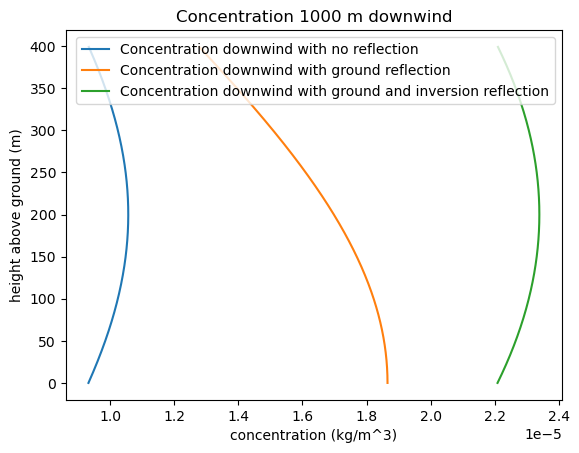

In [12]:
# repeating with a trim at the ground and the inversion height, we get
# And with how the plume concentration varies with height
# Before we made a numpy array for a range of heights above the ground
# What does the computer think is happening below the ground?
z =  np.arange(0,H_I,1)
C=Q/(2*np.pi*u*sig_z*sig_y)*np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2))) 
Cwreflect=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))
Cwreflect2inv=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h-2*H_I,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))

plt.figure()
plt.plot(C, z, label='Concentration downwind with no reflection')
plt.plot(Cwreflect, z, label='Concentration downwind with ground reflection')
plt.plot(Cwreflect2inv, z, label='Concentration downwind with ground and inversion reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 1000 m downwind')
plt.legend(loc="best")

Closer, but still not quite right.  We don't expect a decrease in concentration right where there's a reflection.  Again, consider our picture.  With a reflecting surface and a reflecting inversion, we also have to consider the reflections of the reflections.  Imagine a mirrror looking at a mirror, the images reflect and reflect and reflect.  Let's sketch this out before we code it.

![Inversion 2_reflections](Smokestack_2reflections.jpg)

Note that the above graphic shows a reflection across the inversion height, H_I.  But we also need to fold our paper about the ground line, which creates another set of smokestacks below ground, reflecting the reflected smokestacks.

![Inversion double_reflections](Smokestacks_doublereflections.jpg)

But now these two need to be reflected about the inversion height.  You can see how this process would go on and on infinitely, and it's easy for the person drawing pictures to run out of paper.  Create a formula that generalizes how the reflections occur.  Update the code for concentration to create a plot that includes at least 10 of these reflections.  This is best done with computer code because you can create a function that loops though the values in the generalized formula.  

You may want to use a for loop or the range() function in python -- many examples of the syntax exist on the web.  

### HINTS
First, we need to conceptualize how the various reflected sources work into our equation in a generalizable way. Let's make a table of the terms we've been adding up.

| source | height of source | 
| --- | --- |  
| 0 | $h$ | 
| 1 | $-h$ | 
| 2 | $2H_I - h$ |
| 3 | $2H_I + h$ |
| 4 | $-2H_I - h$ |
| 5 | $-2H_I + h$ |
| 6 | $4H_I - h$ |
| 7 | $4H_I + h$ |
| ... | ... |

How are the multipliers on $H_I$ changing?  Do you see a pattern?  Can you write the basic equation with a summation that uses that pattern?

In [26]:
# And now, an example loop in python to help with coding
for i in range(-10, 10, 1):
    print(i)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9


In [25]:
z1=200
for i in range(-2, 3, 1):
    print(np.exp(-(np.power(z1-h-i*H_I,2)))) 

print('And the sum is')
test2 = sum(np.exp(-(np.power(z1-h-i*H_I,2))) for i in range(-2, 2, 1))
print(test2)

0.0
0.0
1.0
0.0
0.0
And the sum is
1.0
